In [1]:
import tensorflow as tf
generator = tf.keras.models.load_model('d:/data/model/iris_generator.h5')
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        5

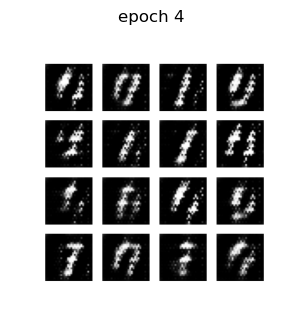

In [3]:
from matplotlib import pyplot as plt
import math
import PIL
plt.figure(figsize=(15,8))
for i in range(1,4):
    plt.subplot(2, 5, math.ceil((i+1)/5))
    img=PIL.Image.open('image_at_epoch_{:04d}.png'.format(i))
    plt.imshow(img, 'gray')
    plt.title(f'epoch {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

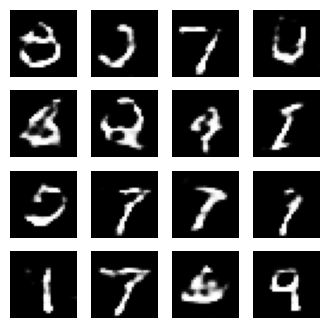

In [4]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

predictions = generator(seed, training=False) 

fig = plt.figure(figsize=(4,4))

for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')